In [73]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
dir = "./outputs/comparing-llms"

In [74]:
def extract_times(lines):
    # Updated regex to capture both integers and floats
    pattern = r"(?:Time completed: |'\d+-\w+': )(\d+(?:\.\d+)?)"
    
    results = []
    for line in lines:
        matches = re.findall(pattern, line)
        results.extend(map(float, matches))  # Convert matches to floats and store them
    return results

In [75]:
data = {}

for filename in os.listdir(dir):
    if not filename.endswith(".txt"):
        continue

    with open(f"{dir}/{filename}") as f:
        lines = f.readlines()

    times = extract_times(lines)
    data[filename] = times



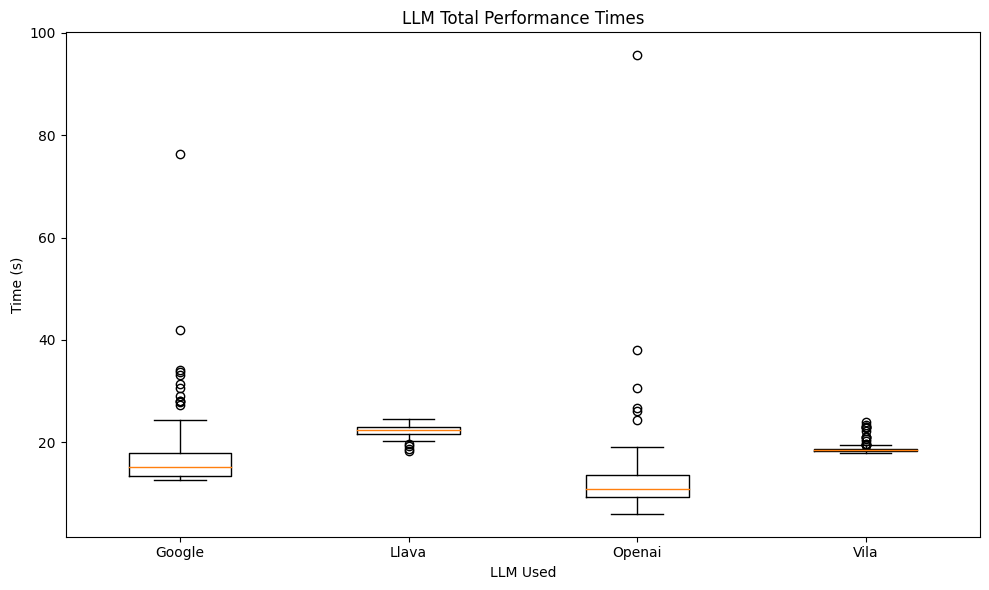

In [77]:
#plot 4 box and whisker plots in one figure

# Plotting the box and whisker plots on one graph
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data and labels
all_data = list(data.values())
#Removes the .txt from the filename
labels = [d[:-16].title() for d in data.keys()]

# Plot boxplots
ax.boxplot(all_data, labels=labels)

# Add title and labels
ax.set_title("LLM Total Performance Times")
ax.set_xlabel("LLM Used")
ax.set_ylabel("Time (s)")

# Display the plot
plt.tight_layout()
plt.savefig("./outputs/comparing-llms/llm-performance-comparison.png")
plt.show()